✅ Complete Python Code: Detecting and Removing Outliers (IQR Method)

💡 **What is an Outlier?**

An outlier is a data point that significantly differs from other observations in a dataset. It can arise due to variability in the data or errors during data collection. Outliers can distort statistical analyses, especially in models like Linear Discriminant Analysis (LDA) that assume normality and equal variances within groups.

### Why detect and handle outliers?
- They can skew the mean and standard deviation.
- They may reduce model performance.
- They often violate statistical assumptions.


✅ Complete Python Code: Detecting and Removing Outliers (IQR Method) ☟

Original Data (first 5 rows):
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Outlier mask (True = outlier):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                False             False              False             False
1                False             False              False             False
2                False             False              False             False
3                False             False              False             False
4                False             False              False             False
..            

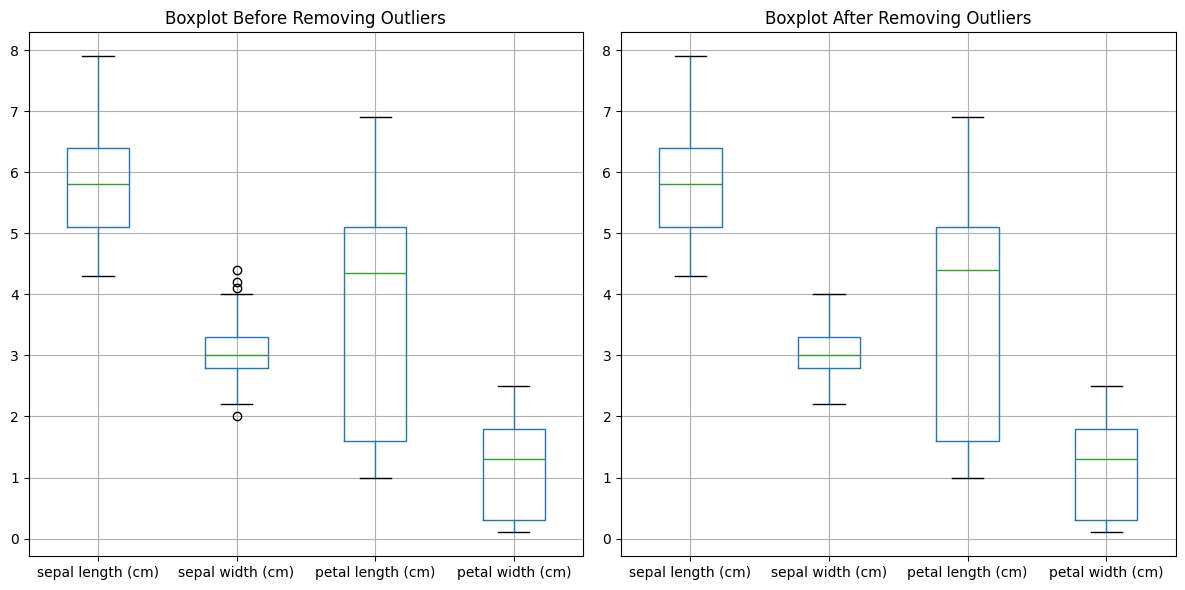

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display the original data
print("Original Data (first 5 rows):")
print(df.head())

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Identify outliers: values below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers_mask = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

# Show which values are considered outliers
print("\nOutlier mask (True = outlier):")
print(outliers_mask)

# Remove rows with any outlier
df_clean = df[~outliers_mask.any(axis=1)]

# Display the cleaned data
print("\nCleaned Data (first 5 rows):")
print(df_clean.head())

# Print shape before and after cleaning
print(f"\nOriginal shape: {df.shape}")
print(f"Shape after outlier removal: {df_clean.shape}")

# Visualize data before and after outlier removal using boxplots
plt.figure(figsize=(12, 6))

# Boxplot before removing outliers
plt.subplot(1, 2, 1)
df.boxplot()
plt.title('Boxplot Before Removing Outliers')

# Boxplot after removing outliers
plt.subplot(1, 2, 2)
df_clean.boxplot()
plt.title('Boxplot After Removing Outliers')

plt.tight_layout()
plt.show()

### Explanation of the Code:

1. **Data Loading**:  
	- The Iris dataset is loaded from `sklearn.datasets` and converted to a Pandas DataFrame for easier manipulation.

2. **IQR Calculation**:  
	- The first quartile (Q1) and third quartile (Q3) are calculated.  
	- The IQR is computed as `Q3 - Q1`.

3. **Outlier Identification**:  
	- Outliers are identified as data points that lie outside the range `[Q1 - 1.5 × IQR, Q3 + 1.5 × IQR]`.

4. **Cleaning the Data**:  
	- Rows with any outliers are removed from the dataset using the `.any(axis=1)` method to check for any `True` values in the outlier mask for each row.

5. **Visualization**:  
	- Two boxplots are created: one for the original data (with outliers) and one for the cleaned data (with outliers removed).  
	- The boxplot shows the distribution of the data, and outliers are represented as individual points outside the whiskers.
	

—————————————————🫶—————————————————

### Boxplot Insights:

- **Before Removing Outliers**:  
  - In the boxplot of the original data, you will see points outside the whiskers, representing outliers. These points are far from the “box” (which represents the interquartile range).

- **After Removing Outliers**:  
  - In the cleaned dataset’s boxplot, you should see a more compact distribution with fewer or no points outside the whiskers, indicating that outliers have been removed.

This helps visualize how outliers can distort data distributions and how their removal affects the analysis.